In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline 

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load datasets

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/ASUU.csv', encoding='utf-8')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3 non-null      int64 
 1   tweets      3 non-null      object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [5]:
#remove pattern in the dataset
def remove_pattern(text):
  text = re.findall(pattern, df)
  for word in text:
    df = re.sub(word, "", df)
  
  return df
  df

In [6]:
#create clean function
def cleantxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'$', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'0-9[A-Za-z]+', '', text)
  text = text.lower()
 


  return text
  
df['tweets'] = df['tweets'].apply(cleantxt)

df.head()

,Unnamed: 0,tweets
0,0,conquer your fearclear your doubtsembrace your...
1,2,conquer your fearclear your doubtsembrace your...
2,4,conquer your fearclear your doubtsembrace your...


In [7]:
df['clean_text'] = df['tweets'].str.replace("[^a-zA-Z#]", " ")
df.head()

,Unnamed: 0,tweets,clean_text
0,0,conquer your fearclear your doubtsembrace your...,conquer your fearclear your doubtsembrace your...
1,2,conquer your fearclear your doubtsembrace your...,conquer your fearclear your doubtsembrace your...
2,4,conquer your fearclear your doubtsembrace your...,conquer your fearclear your doubtsembrace your...


In [8]:
#remove stop words
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Unnamed: 0,tweets,clean_text
0,0,conquer your fearclear your doubtsembrace your...,conquer your fearclear your doubtsembrace your...
1,2,conquer your fearclear your doubtsembrace your...,conquer your fearclear your doubtsembrace your...
2,4,conquer your fearclear your doubtsembrace your...,conquer your fearclear your doubtsembrace your...


In [9]:
#tokenization
tokenized = df['clean_text'].apply(lambda x: x.split())
tokenized.head()

0    [conquer, your, fearclear, your, doubtsembrace...
1    [conquer, your, fearclear, your, doubtsembrace...
2    [conquer, your, fearclear, your, doubtsembrace...
Name: clean_text, dtype: object

In [10]:
#stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized = tokenized.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized.head()

0    [conquer, your, fearclear, your, doubtsembrac,...
1    [conquer, your, fearclear, your, doubtsembrac,...
2    [conquer, your, fearclear, your, doubtsembrac,...
Name: clean_text, dtype: object

In [11]:
df['clean_text'] = tokenized
df.head()

,Unnamed: 0,tweets,clean_text
0,0,conquer your fearclear your doubtsembrace your...,"[conquer, your, fearclear, your, doubtsembrac,..."
1,2,conquer your fearclear your doubtsembrace your...,"[conquer, your, fearclear, your, doubtsembrac,..."
2,4,conquer your fearclear your doubtsembrace your...,"[conquer, your, fearclear, your, doubtsembrac,..."


In [12]:
df['clean_text'] = df['tweets'].str.replace("[^a-zA-Z#]", " ")
df.head()

,Unnamed: 0,tweets,clean_text
0,0,conquer your fearclear your doubtsembrace your...,conquer your fearclear your doubtsembrace your...
1,2,conquer your fearclear your doubtsembrace your...,conquer your fearclear your doubtsembrace your...
2,4,conquer your fearclear your doubtsembrace your...,conquer your fearclear your doubtsembrace your...


In [13]:
#create a function to get subjectivity

from textblob import TextBlob

def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


#create a function to get polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['subjectivity'] = df['tweets'].apply(getsubjectivity)
df['polarity'] = df['tweets'].apply(getpolarity)


#show new dataframe
df

,Unnamed: 0,tweets,clean_text,subjectivity,polarity
0,0,conquer your fearclear your doubtsembrace your...,conquer your fearclear your doubtsembrace your...,0.0,0.0
1,2,conquer your fearclear your doubtsembrace your...,conquer your fearclear your doubtsembrace your...,0.0,0.0
2,4,conquer your fearclear your doubtsembrace your...,conquer your fearclear your doubtsembrace your...,0.0,0.0


In [14]:
#sentiment text function
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
#add sentiment column to dataframe
df['sentiment'] = df['polarity'].apply(getSentiment)
df[200:500]

,Unnamed: 0,tweets,clean_text,subjectivity,polarity,sentiment


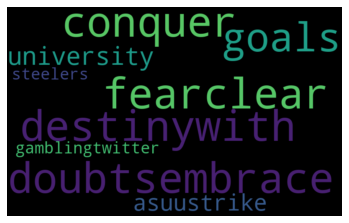

In [15]:
#Visualization and exploration of dataset
allWords = ' '.join( [sentence for sentence in df['clean_text']] )

from wordcloud import WordCloud
wordCloud = WordCloud(width = 800, height = 500, random_state=42, max_font_size=100).generate(allWords)

#plot wordcloud
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#positive words visualization
allwords = " ".join([sentence for sentence in df['clean_text'][df['polarity'] > 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(allwords)


#wordcloud

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
#positive words visualization
allwords = " ".join([sentence for sentence in df['clean_text'][df['polarity'] < 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(allwords)


#wordcloud

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

ValueError: ignored

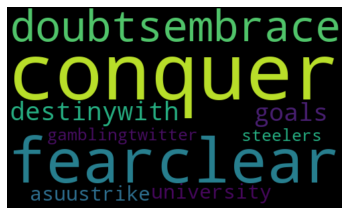

In [18]:
#plot wordcloud 
allWords = ' '.join( [twts for twts in df['clean_text']] )
wordCloud = WordCloud(width = 500, height = 300, random_state=23, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

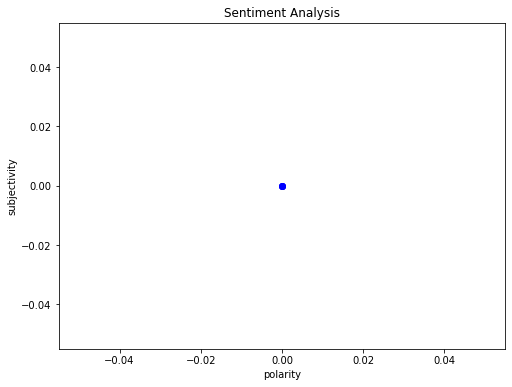

In [19]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['polarity'][i], df['subjectivity'][i], color='Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

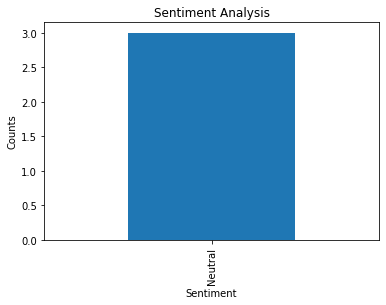

In [20]:
#plot and visualize counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['sentiment'].value_counts().plot(kind='bar')
plt.show()

In [21]:
#creating a label for the tweets
def createlabel(score):
  if score < 0:
    return -1
  elif score >0 and score < 1:
    return 1
  else:
    return 0


#add label top dataframe
df['label'] = df['polarity'].apply(createlabel)
df[200:215]

,Unnamed: 0,tweets,clean_text,subjectivity,polarity,sentiment,label


In [22]:
#input split and feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vect = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vect.fit_transform(df['clean_text'])

ValueError: ignored

In [ ]:
# bow[0].toarray()

In [ ]:
bow

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.30) 

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [ ]:
#model training

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# model training
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
# testing
pred = model.predict(x_test)
accuracy_score(y_test, pred)

In [ ]:
# use probabilty to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(np.int)

#f1_score(y_test, pred)
accuracy_score(y_test, pred)

In [ ]:
pred_prob[0]

In [ ]:
# second split
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [ ]:
x_train = train['clean_text']
x_test = test['clean_text']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vector = TfidfVectorizer(use_idf=True)

In [ ]:
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
def models(model):
  y_pred = model.predict(x_test)

  accuracy = accuracy_score(y_pred, x_test['sentiment'])
  recall = recall_score(y_pred, x_test['sentiment'].pos_label='negative')
  precision = precision_score(y_pred, test['sentiment'].pos_label='negative')

  return (accuracy, recall, precision)